Dengan menggunakan data passanger.csv, lakukanlah data preparation pada breakoutroom kali ini.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/MBKM Data Scientist/Dataset - Data Preparation using Python and EDA/passenger.csv')

# Case 1

Berikan informasi-informasi terkait data passenger.

In [7]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
mv = pd.isnull(df).sum()
mv

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
rasio = jumlah_missing.div(len(df))
rasio

Bagaimana Summary Statistics dari data tersebut ?



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   892 non-null    int64  
 1   PassengerId  892 non-null    int64  
 2   Survived     892 non-null    int64  
 3   Pclass       892 non-null    int64  
 4   Name         892 non-null    object 
 5   Sex          892 non-null    object 
 6   Age          715 non-null    float64
 7   SibSp        892 non-null    int64  
 8   Parch        892 non-null    int64  
 9   Ticket       892 non-null    object 
 10  Fare         892 non-null    float64
 11  Cabin        205 non-null    object 
 12  Embarked     890 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.7+ KB


# Case 2

Apakah terdapat Missing Values ?

In [12]:
mv = pd.isnull(df).sum()
mv

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
rasio = mv.div(len(df))
rasio

Unnamed: 0     0.000000
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198430
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.770179
Embarked       0.002242
dtype: float64

Apabila terdapat missing values, lakukanlah data cleaning.

In [13]:
df = df.drop(['Cabin'], axis=1)

In [14]:
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df['Age'].describe()

count    715.000000
mean      29.684154
std       14.521835
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

In [19]:
pd.isnull(df).sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
df=df.dropna(axis=0,how="any")

In [21]:
pd.isnull(df).sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Case 3

Apakah terdapat data duplicate? 

In [29]:
df[df[["PassengerId","Name"]].duplicated(keep=False)].sort_values("PassengerId")

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_p
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,S,19
891,891,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,S,19


Apabila terdapat duplicate, hapuslah data duplikasinya.

In [30]:
df = df.drop_duplicates(subset=["PassengerId","Name"]).reset_index()

In [31]:
df[df[["PassengerId","Name"]].duplicated(keep=False)].sort_values("PassengerId")

,index,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_p


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        889 non-null    int64  
 1   Unnamed: 0   889 non-null    int64  
 2   PassengerId  889 non-null    int64  
 3   Survived     889 non-null    int64  
 4   Pclass       889 non-null    int64  
 5   Name         889 non-null    object 
 6   Sex          889 non-null    object 
 7   Age          889 non-null    float64
 8   SibSp        889 non-null    int64  
 9   Parch        889 non-null    int64  
 10  Ticket       889 non-null    object 
 11  Fare         889 non-null    float64
 12  Embarked     889 non-null    object 
 13  Age_p        889 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.4+ KB


# Case 4

Data pada kolom Age memiliki tipe data float, ubahlah tipe data Age menjadi integer.

In [22]:
df['Age'].dtypes

dtype('float64')

In [23]:
df['Age_p']=df['Age'].astype(int)


In [25]:
df['Age_p'].dtypes

dtype('int64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   890 non-null    int64  
 1   PassengerId  890 non-null    int64  
 2   Survived     890 non-null    int64  
 3   Pclass       890 non-null    int64  
 4   Name         890 non-null    object 
 5   Sex          890 non-null    object 
 6   Age          890 non-null    float64
 7   SibSp        890 non-null    int64  
 8   Parch        890 non-null    int64  
 9   Ticket       890 non-null    object 
 10  Fare         890 non-null    float64
 11  Embarked     890 non-null    object 
 12  Age_p        890 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 97.3+ KB


# Case 5

Hitunglah jumlah penumpang berdasar jenis kelaminnya!

In [38]:
df['Sex'].count

<bound method Series.count of 0        male
1      female
2      female
3      female
4        male
        ...  
884      male
885    female
886    female
887      male
888      male
Name: Sex, Length: 889, dtype: object>

In [42]:
Female=df[df['Sex']=='female']
Female.count()

index          312
Unnamed: 0     312
PassengerId    312
Survived       312
Pclass         312
Name           312
Sex            312
Age            312
SibSp          312
Parch          312
Ticket         312
Fare           312
Embarked       312
Age_p          312
dtype: int64

In [43]:
Male=df[df['Sex']=='male']
Male.count()

index          577
Unnamed: 0     577
PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            577
SibSp          577
Parch          577
Ticket         577
Fare           577
Embarked       577
Age_p          577
dtype: int64

Kelompokkan jumlah penumpang berdasar kolom embarked

In [46]:
df.groupby('Embarked')['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

Lakukan penggabungan pengelompokan berdasar kedua pengelompokan sebelumnya yaitu berdasar embarked dan jenis kelamin.

In [48]:
df.groupby('Embarked')['Sex'].count()

Embarked
C    168
Q     77
S    644
Name: Sex, dtype: int64

# Case 6

Berapakah rata-rata usia penumpang?

In [49]:
df['Age_p'].mean()

29.498312710911136

Berapa rata-rata tarif penumpang?

In [50]:
df['Fare'].mean()

32.09668087739032

Berapa rata-rata tarif setiap kelasnya?

In [52]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Buatlah chart, dengan melihat berapa banyak yang selamat pada jenis kelamin laki-laki dan perempuan

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(style="whitegrid", font_scale=1.75)

In [54]:
df.groupby('Sex')['Survived'].count()

Sex
female    312
male      577
Name: Survived, dtype: int64

<Figure size 720x576 with 0 Axes>

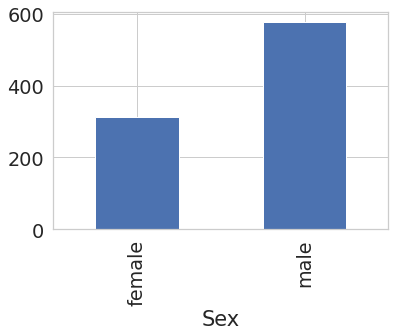

<Figure size 720x576 with 0 Axes>

In [55]:
df.groupby('Sex')['Survived'].count().plot.bar()
plt.figure(figsize=(10,8))